# Clase de Data Analytics - Análisis de negocios

Este notebook abarca varios ejercicios enfocados en análisis de datos y visualización. Se revisan conceptos como tasas de conversión, embudos de marketing y análisis de cohortes.

## Ejercicio 1: Tasa de conversión

### Concepto teórico:
La **tasa de conversión** es una métrica que permite medir el porcentaje de visitantes o usuarios que realizan una acción deseada (por ejemplo, una compra). Es fundamental en marketing digital para evaluar la eficacia de una campaña o la experiencia del usuario en una tienda.

$\text{Tasa de conversión} = \dfrac{\text{Usuarios/acciones en la etapa siguiente}}{\text{Usuarios/acciones en la etapa anterior}} \times 100$


### En este ejercicio:
Se muestran las tasas de CTR y CR

- **CTR (Click Through Rate):** Porcentaje de impresiones que generan clics.
- **CR (Conversion Rate):** Porcentaje de clics que se convierten en registros o ventas.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy

funnel = pd.read_csv("datasets/funnel_daily.csv")

# Conversión de impresiones a clics
funnel["ctr"] = funnel["clicks"] / funnel["impressions"] * 100

# Conversión de clics a registros
funnel["cr"] = funnel["registrations"] / funnel["clicks"] * 100

# Promedios globales
ctr_avg = funnel["ctr"].mean()
cr_avg = funnel["cr"].mean()

print(f"CTR: {ctr_avg:.2f}%")
print(f"CR: {cr_avg:.2f}%")

CTR: 7.64%
CR: 34.60%


## Ejercicio 2: Embudos

### Concepto teórico:
Un **embudo de conversión** es una representación gráfica que muestra las diferentes etapas que atraviesa un usuario antes de completar una acción (por ejemplo, comprar un producto). Permite identificar en qué punto se pierden los usuarios y optimizar el proceso.

### En este ejercicio:
Se visualiza el embudo de compra de la tienda, mostrando las etapas del proceso (desde la página principal hasta el pedido).


Embudo de conversión:
event_name
pageview       133
add_to_cart     92
checkout        48
payment         37
Name: uid, dtype: int64


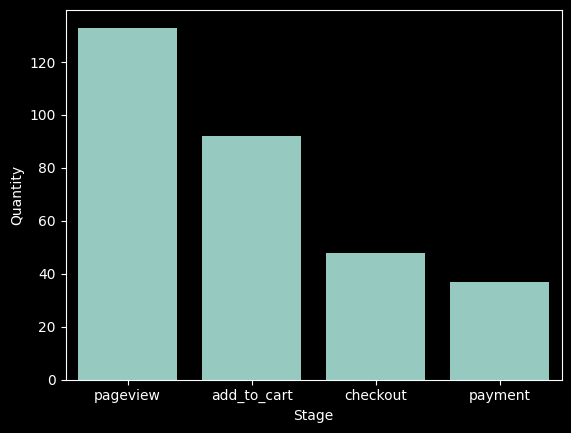

In [15]:
#Calcular el embudo a nivel de acciones
events = pd.read_csv("datasets/events.csv")
usuarios_por_evento = events.groupby("event_name")["uid"].count()
orden_funnel = ["pageview", "add_to_cart", "checkout", "payment"]
usuarios_funnel = usuarios_por_evento.reindex(orden_funnel)
print("\nEmbudo de conversión:")
print(usuarios_funnel)

# Aplicar un estilo de fondo oscuro para el gráfico
plt.style.use("dark_background")

# Crear un gráfico de barras con los datos
sns.barplot(data=usuarios_funnel)

# Configurar etiquetas y título
plt.xlabel('Stage')
plt.ylabel('Quantity')

# Mostrar el gráfico
plt.show()


## Ejercicio 3: Embudo de marketing – Agrupación por semanas y meses

### Concepto teórico:
Agrupar datos por intervalos (semanas o meses) es fundamental para detectar tendencias a lo largo del tiempo. En el contexto de embudos de marketing, esto permite evaluar cómo varían las métricas (CTR y CR) en diferentes periodos y tomar decisiones basadas en patrones temporales.

### En este ejercicio:
Se agrupan los datos diarios para calcular métricas semanales y mensuales, facilitando el análisis de la evolución de las campañas publicitarias.

(array([18993., 19000., 19007., 19014., 19024., 19031., 19038., 19045.]),
 [Text(18993.0, 0, '2022-01-01'),
  Text(19000.0, 0, '2022-01-08'),
  Text(19007.0, 0, '2022-01-15'),
  Text(19014.0, 0, '2022-01-22'),
  Text(19024.0, 0, '2022-02-01'),
  Text(19031.0, 0, '2022-02-08'),
  Text(19038.0, 0, '2022-02-15'),
  Text(19045.0, 0, '2022-02-22')])

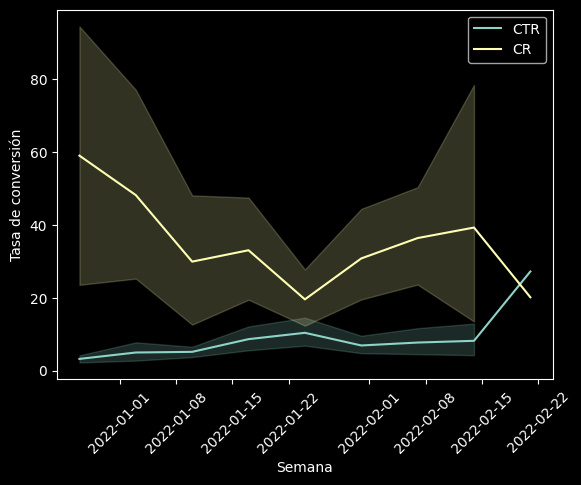

In [21]:
#Convertir la columna 'date' a tipo datetime y extraer la semana
funnel['date'] = pd.to_datetime(funnel['date'])
funnel['week'] = funnel['date'].dt.to_period("W").dt.start_time

# Crear el gráfico de líneas para cada tienda
ax = sns.lineplot(data=funnel, x="week", y="ctr", label='CTR', )
sns.lineplot(data= funnel, x="week", y="cr", label='CR')

# Configurar etiquetas y título del gráfico
plt.xlabel('Semana')  # Eje X: Días
plt.ylabel('Tasa de conversión')  # Eje Y: Tasa de conversión
plt.xticks(rotation=45)


## Ejercicio 4: Embudos de producto simples

### Concepto teórico:
El análisis de **embudos de producto** se centra en medir la interacción de los usuarios con distintos eventos de una aplicación o plataforma, identificando la cantidad de usuarios únicos en cada evento (por ejemplo, ver una página, enviar un mensaje o completar una acción exitosa).

### En este ejercicio:
Se calcula la cantidad de usuarios únicos por evento y se visualiza la actividad utilizando tanto agrupaciones numéricas como gráficos de línea.

              uid
event_name       
chat_message  294
pageview      279
success       267


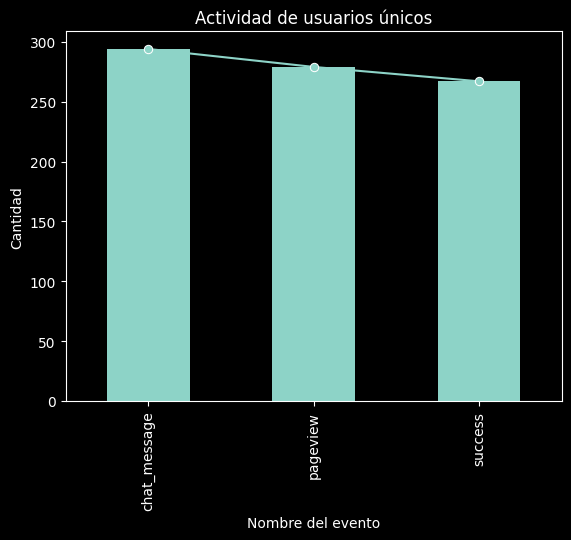

In [22]:
import pandas as pd

# Leer el archivo CSV con eventos de producto
events = pd.read_csv("datasets/funnel_prod_events.csv")

# Agrupar los eventos por nombre y contar usuarios únicos
users_count = events.groupby('event_name').agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False)
print(users_count)

users_count.plot(kind='bar',legend=False)

# Graficar la actividad de usuarios únicos
sns.lineplot(data=users_count, marker='o',legend=False)

# Configurar etiquetas y título
plt.xlabel('Nombre del evento')
plt.ylabel('Cantidad')
plt.title('Actividad de usuarios únicos')

# Mostrar el gráfico
plt.show()

## Segundo momento: Análisis de cohortes

El análisis de cohortes es una técnica que agrupa a los usuarios según un evento común (por ejemplo, la primera compra o actividad) para analizar su comportamiento a lo largo del tiempo. Esto permite identificar patrones de retención, abandono y evolución en el comportamiento de los usuarios.

En las siguientes secciones se abordarán diferentes aspectos del análisis de cohortes, desde la agrupación inicial hasta la visualización de la retención y la tasa de cancelación.

### Cohorte 1: Análisis de cohortes en Python

#### Concepto teórico:
En este ejercicio se agrupa a los usuarios por el mes de su primera compra. De esta manera, se puede analizar cuánto gasta cada cohorte de usuarios a lo largo del tiempo. Esto es útil para identificar qué cohortes tienen mayor valor a lo largo de su ciclo de vida.

#### En este ejercicio:
Se convierte la fecha a un período mensual y vamos a determinar gasto total (price) por el primer mes de compra y la cantidad de usuarios, al igual que ver el ticket promedio.

In [ ]:
purchases = pd.read_csv("datasets/game_purchases.csv")

first_purchase_dates = purchases.groupby('player_id')['purchase_datetime'].min()
first_purchase_dates.name = 'first_purchase_datetime'
purchases = purchases.join(first_purchase_dates, on='player_id')


# Convertir las fechas a períodos mensuales para agrupar por mes
purchases['purchase_month'] = pd.to_datetime(purchases['purchase_datetime']).dt.to_period('M')
purchases['first_purchase_month'] = pd.to_datetime(purchases['first_purchase_datetime']).dt.to_period('M')

# Agrupar por el primer mes de compra y sumar el gasto
cohort_stats = purchases.groupby('first_purchase_month').agg({"price": ["sum", "mean"], "player_id":"nunique"})
display(cohort_stats)

price            player_id
                            sum       mean   nunique
first_purchase_month                                
2022-01               143333.99  25.440893      1917
2022-02               109917.51  25.101053      1512
2022-03                94593.99  25.292511      1366
2022-04                73387.02  25.437442      1094
2022-05                62786.82  25.848835       982
2022-06                45119.02  25.752865       743
2022-07                32240.43  25.406170       594
2022-08                25205.34  24.931098       519
2022-09                19175.72  25.264453       431
2022-10                11730.89  25.669344       312
2022-11                 8341.67  24.900507       258
2022-12                 7226.80  24.009302       271

### Cohorte 2: Evaluación de cambios en los valores absolutos por mes

#### Concepto teórico:
Este análisis compara, para cada cohorte (definida por el mes de la primera compra), el número de compras y usuarios únicos en distintos meses, permitiendo calcular el promedio de compras por jugador. Esto ayuda a evaluar la fidelidad y actividad de cada cohorte a lo largo del tiempo.

#### En este ejercicio:
Se agrupan las compras por el mes de la primera compra y el mes de la compra, calculando el promedio de compras por jugador.

purchase_month,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
first_purchase_month,,,,,,,,,,,,
2022-01,1.093375,1.067164,1.067524,1.066445,1.067901,1.069597,1.088957,1.064516,1.055921,1.063830,1.082508,1.065147
2022-02,NaN,1.082672,1.085366,1.088123,1.087302,1.065891,1.063745,1.060976,1.059259,1.047431,1.064885,1.063670
2022-03,NaN,NaN,1.101757,1.086957,1.079439,1.056680,1.068493,1.088889,1.072072,1.135021,1.051948,1.073171
2022-04,NaN,NaN,NaN,1.105119,1.107692,1.086758,1.064865,1.085308,1.092391,1.102941,1.029240,1.102273
2022-05,NaN,NaN,NaN,NaN,1.115071,1.094444,1.131429,1.094241,1.087248,1.130952,1.088889,1.083333
2022-06,NaN,NaN,NaN,NaN,NaN,1.095559,1.064935,1.102041,1.051095,1.115108,1.101351,1.102941
2022-07,NaN,NaN,NaN,NaN,NaN,NaN,1.111111,1.076271,1.151515,1.106557,1.118110,1.045977
2022-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.117534,1.152174,1.092784,1.054348,1.140187
2022-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097448,1.104651,1.150538,1.135135


<Axes: xlabel='purchase_month', ylabel='first_purchase_month'>

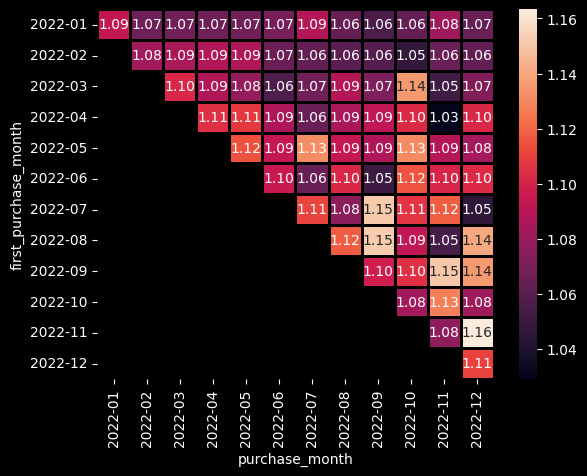

In [ ]:
# Agrupar por primer mes de compra y mes de compra para calcular métricas
purchases_grouped_by_cohorts = purchases.groupby(['first_purchase_month', 'purchase_month']).agg({
    'purchase_id': 'nunique',
    'player_id': 'nunique'
})

# Calcular el promedio de compras por jugador
purchases_grouped_by_cohorts['purchases_per_player'] = purchases_grouped_by_cohorts['purchase_id'] / purchases_grouped_by_cohorts['player_id']

# Crear una tabla pivote para visualizar la evolución de la métrica
mean_purchases_pivot = purchases_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='purchase_month',
    values='purchases_per_player',
    aggfunc='sum'
)
display(mean_purchases_pivot)
# Crear un mapa de calor con la tabla pivot
sns.heatmap(mean_purchases_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='black')

### Cohorte 3: Evaluación de los cambios en los valores relativos por ciclo de vida

#### Concepto teórico:
Este ejercicio analiza la evolución del número de compras por jugador a lo largo del tiempo, desde su primera compra. La diferencia en meses entre el primer mes de compra y el mes actual se denomina "cohort lifetime" y permite medir cómo varía la actividad de la cohorte.

#### En este ejercicio:
Se calcula el ciclo de vida de la cohorte en meses y se genera una tabla pivote que muestra el promedio de compras por jugador a lo largo de este ciclo.

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2022-01,1.093375,1.067164,1.067524,1.066445,1.067901,1.069597,1.088957,1.064516,1.055921,1.063830,1.082508,1.065147
2022-02,1.082672,1.085366,1.088123,1.087302,1.065891,1.063745,1.060976,1.059259,1.047431,1.064885,1.063670,NaN
2022-03,1.101757,1.086957,1.079439,1.056680,1.068493,1.088889,1.072072,1.135021,1.051948,1.073171,NaN,NaN
2022-04,1.105119,1.107692,1.086758,1.064865,1.085308,1.092391,1.102941,1.029240,1.102273,NaN,NaN,NaN
2022-05,1.115071,1.094444,1.131429,1.094241,1.087248,1.130952,1.088889,1.083333,NaN,NaN,NaN,NaN
2022-06,1.095559,1.064935,1.102041,1.051095,1.115108,1.101351,1.102941,NaN,NaN,NaN,NaN,NaN
2022-07,1.111111,1.076271,1.151515,1.106557,1.118110,1.045977,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,1.117534,1.152174,1.092784,1.054348,1.140187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,1.097448,1.104651,1.150538,1.135135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_lifetime', ylabel='first_purchase_month'>

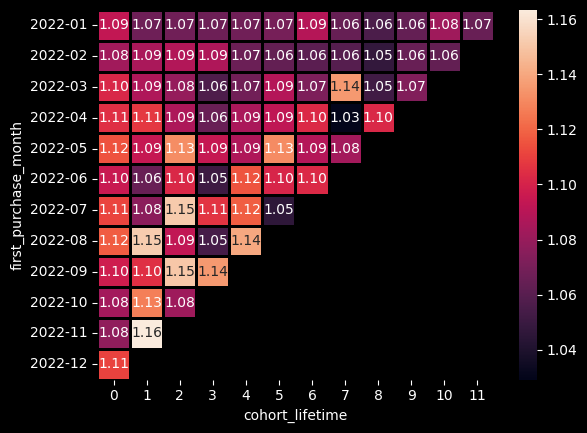

In [ ]:
# Reiniciar el índice para facilitar los cálculos
purchases_grouped_by_cohorts = purchases_grouped_by_cohorts.reset_index()

# Calcular la diferencia en meses (cohort lifetime) usando la propiedad .n
purchases_grouped_by_cohorts['cohort_lifetime'] = (purchases_grouped_by_cohorts['purchase_month'] - purchases_grouped_by_cohorts['first_purchase_month']).apply(lambda x: x.n)
purchases_grouped_by_cohorts

# Crear una tabla pivote para visualizar la evolución de la actividad de la cohorte
lifetime_pivot = purchases_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='cohort_lifetime',
    values='purchases_per_player',
    aggfunc='sum'
)
display(lifetime_pivot)

# Crear un mapa de calor con la tabla pivot
sns.heatmap(lifetime_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='black')

### Cohorte 5: Tasa de retención y de cancelación

#### Concepto teórico:
La **tasa de retención** mide el porcentaje de usuarios que continúan utilizando una aplicación o servicio en periodos sucesivos. La **tasa de cancelación** (churn rate) indica el porcentaje de usuarios que abandonan la plataforma. Estas métricas son fundamentales para evaluar la fidelidad del cliente y el éxito de estrategias de retención.

Tasa de retención (Retention) en el periodo t:

$\text{Retention}(t) = \dfrac{\text{Usuarios activos en el periodo } t}{\text{Usuarios iniciales en la cohorte}} \times 100$

Tasa de cancelación (Churn) en el periodo t:

$\text{Churn}(t) = \left( 1 - \dfrac{\text{Usuarios activos en el periodo } t}{\text{Usuarios iniciales en la cohorte}} \right) \times 100$

#### En este ejercicio:
1. Se realiza el cáclulo de la taza retención  semanal.

In [ ]:
# Leer datos de actividad de usuario
user_activity = pd.read_csv("datasets/work_user_activity.csv")

# Convertir la columna 'activity_date' a datetime
user_activity['activity_date'] = pd.to_datetime(user_activity['activity_date'])

# Calcular la primera actividad para cada usuario
first_activity_date = user_activity.groupby(['user_id'])['activity_date'].min()
first_activity_date.name = 'first_activity_date'
user_activity = user_activity.join(first_activity_date, on='user_id')

# Calcular el inicio de la semana para cada fecha de actividad
user_activity['activity_week'] = pd.to_datetime(user_activity['activity_date']).dt.to_period("W").dt.start_time
user_activity['first_activity_week'] = pd.to_datetime(user_activity['first_activity_date']).dt.to_period("W").dt.start_time

#Cohorte
user_activity['cohort_lifetime'] = (user_activity['activity_week'] - user_activity['first_activity_week']) / np.timedelta64(1, 'W')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype(int)

# Agrupar por la semana de la primera actividad y el tiempo transcurrido
cohorts = user_activity.groupby(['first_activity_week', 'cohort_lifetime']).agg({'user_id': 'nunique'}).reset_index()

cohorts.head()

# Calcular el número inicial de usuarios por cohorte (cuando cohort_lifetime = 0)
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week', 'user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id': 'cohort_users'})

# Unir los datos iniciales a cada cohorte y calcular la tasa de retención
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users']

# Crear una tabla pivote para visualizar la retención por cohorte
retention_pivot = cohorts.pivot_table(index='first_activity_week', columns='cohort_lifetime', values='retention', aggfunc='sum')
print(retention_pivot)

NameError: name 'np' is not defined

2. Se calcula la tasa de cancelación a partir del número de usuarios en distintos periodos y se visualiza mediante un mapa de calor.

cohort_lifetime        0         1         2         3         4         5
first_activity_week                                                       
2021-12-27           0.0  0.023077  0.000000  0.038462  0.038462  0.746154
2022-01-03           0.0  0.026074  0.041411  0.032209  0.176380  0.952454
2022-01-10           0.0  0.065327  0.110553  0.090452  0.537688       NaN
2022-01-17           0.0  0.437500  0.250000  0.750000       NaN       NaN
2022-01-24           0.0  0.000000       NaN       NaN       NaN       NaN


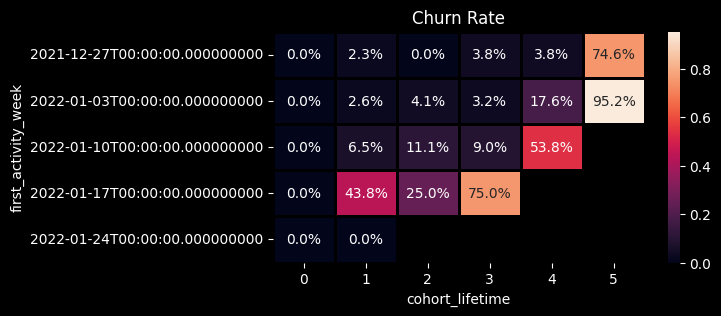

In [ ]:
# Calcular la tasa de cancelación como complemento de la retención
cohorts['churn'] = 1 - cohorts['retention']

# Crear tabla pivote de cancelación
churn_pivot = cohorts.pivot_table(
    index='first_activity_week',
    columns='cohort_lifetime',
    values='churn',
    aggfunc='mean'
)

print(churn_pivot)

# Configurar la figura y graficar el mapa de calor
plt.figure(figsize=(6, 3))
plt.title('Churn Rate')
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black')
plt.show()